In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
import os
import pickle
import seaborn as sns
from sklearn.cluster import MeanShift, AffinityPropagation
from sklearn.metrics import davies_bouldin_score

In [9]:
with open(os.path.join("..", "data", "cluster_df_normal.pickle"), "rb") as archivo:
    cluster_df_normal = pickle.load(archivo)

In [10]:
cluster_df_normal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7790 entries, 39110:xxbladexx20 to 16656371:Aoto_uchiha10
Columns: 583 entries, Roommates to Gangs
dtypes: float64(583)
memory usage: 34.7+ MB


In [11]:
# Realizamos PCA con 2 componentes
pca = PCA(n_components=2)
principal_components = pca.fit_transform(cluster_df_normal)

# Creamos un nuevo DataFrame con los componentes principales
columns = ['PC1', 'PC2']
pca_df = pd.DataFrame(data=principal_components, columns=columns, index=cluster_df_normal.index)

In [12]:
pca_df

,PC1,PC2
39110:xxbladexx20,-0.086912,0.056696
216949:haijuta,-0.003905,-0.050637
246587:d3athzero,-0.011795,0.007795
107198:JayJay1401,0.013501,0.007883
45036:Seleare,-0.119372,0.168611
...,...,...
17197026:dumb_zoro_,0.046914,0.016123
16617450:kotyboh,-0.040846,0.021958
16459755:Tiberjuice,-0.009188,-0.039892
16965619:Watcher794_2,-0.059908,-0.032366


In [13]:
cluster_df_normal

,Roommates,Hosts,Criminals,Afterlife,French Revolution,Pet Shop,Okinawa,13th Century,Slice of Life,Outer Space,...,Self-Harm,Board Games,Penguins,Single Parent,Based on a Webtoon,BDSM,Fake Romance,Dragon Quest,10th Century,Gangs
39110:xxbladexx20,0.000000,0.003043,0.000000,0.000000,0.0,0.0,0.0,0.0,0.023665,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.003043
216949:haijuta,0.000000,0.000000,0.031546,0.000000,0.0,0.0,0.0,0.0,0.000000,0.031546,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
246587:d3athzero,0.000271,0.000136,0.000624,0.000922,0.0,0.0,0.0,0.0,0.007921,0.002550,...,0.0,0.000732,0.0,0.000543,0.000827,0.0,0.000637,0.0,0.000136,0.002875
107198:JayJay1401,0.000000,0.000000,0.003110,0.002210,0.0,0.0,0.0,0.0,0.005402,0.001146,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.004502
45036:Seleare,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17197026:dumb_zoro_,0.000000,0.000000,0.006583,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
16617450:kotyboh,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
16459755:Tiberjuice,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.028800,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
16965619:Watcher794_2,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.019444,0.000000,...,0.0,0.000000,0.0,0.000000,0.005556,0.0,0.000000,0.0,0.000000,0.000000


In [14]:
# Aplicar Mean Shift
meanshift = MeanShift()
meanshift_labels = meanshift.fit_predict(cluster_df_normal)

# Calcular el score de silueta
silhouette_avg = silhouette_score(cluster_df_normal, meanshift_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.2494661378941875


In [15]:
# Aplicar Affinity Propagation
affinity_propagation = AffinityPropagation()
affinity_labels = affinity_propagation.fit_predict(cluster_df_normal)

# Calcular el score de silueta
silhouette_avg = silhouette_score(cluster_df_normal, affinity_labels)
print(f"Silhouette Score: {silhouette_avg}")

C:\Users\56936\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_affinity_propagation.py:236: ConvergenceWarning: Affinity propagation did not converge, this model may return degenerate cluster centers and labels.
  warnings.warn(


Silhouette Score: 0.034701727510405275


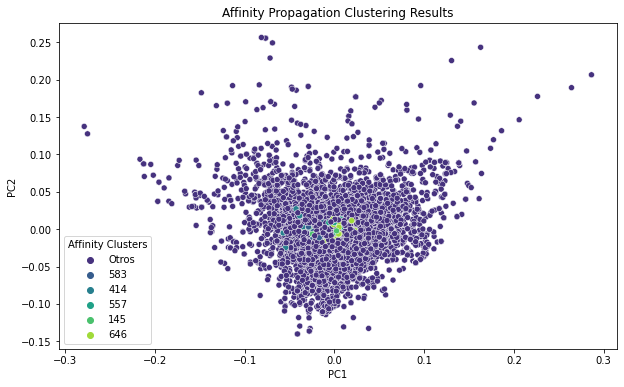

In [19]:
# Crear DataFrame para visualización
visual_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
visual_df['Affinity Clusters'] = affinity_labels

# Filtrar y mostrar solo los primeros N clusters más grandes
n_top_clusters = 5 
counts = visual_df['Affinity Clusters'].value_counts()
top_clusters = counts.head(n_top_clusters).index
visual_df['Affinity Clusters'] = (
    visual_df['Affinity Clusters'].where(visual_df['Affinity Clusters'].isin(top_clusters),
                                          'Otros'))

# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Affinity Clusters', data=visual_df, palette='viridis', legend='full')
plt.title('Affinity Propagation Clustering Results')
plt.show()

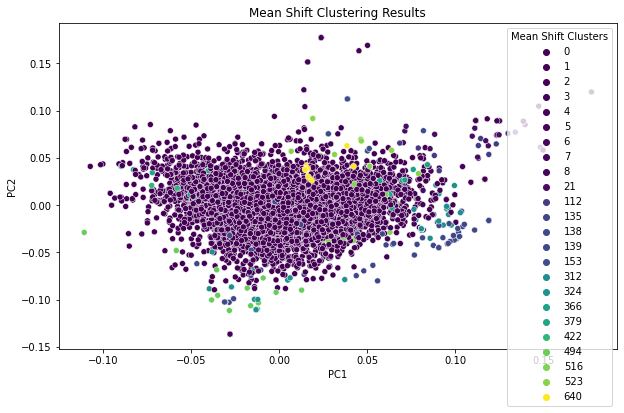

In [20]:
# Crear DataFrame para visualización
visual_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
visual_df['Mean Shift Clusters'] = meanshift_labels

# Filtrar clusters que tienen menos de cierta cantidad de puntos
min_cluster_size = 10
counts = visual_df['Mean Shift Clusters'].value_counts()
major_clusters = counts[counts >= min_cluster_size].index
visual_df_major_clusters = visual_df[visual_df['Mean Shift Clusters'].isin(major_clusters)]

# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Mean Shift Clusters', data=visual_df_major_clusters, palette='viridis', legend='full')
plt.title('Mean Shift Clustering Results')
plt.show()

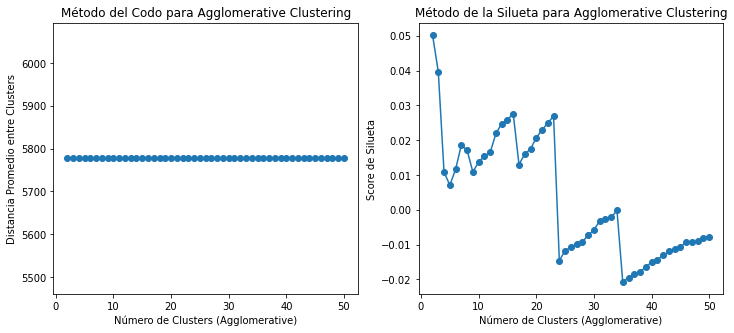

In [23]:
# Método del Codo y Silueta para Agglomerative Clustering
agg_silhouette_scores = []
avg_distances = []
max_clusters = 50

for k in range(2, max_clusters + 1):
    agg_clustering = AgglomerativeClustering(n_clusters=k)
    agg_labels = agg_clustering.fit_predict(cluster_df_normal)
    
    silhouette_avg = silhouette_score(cluster_df_normal, agg_labels)
    agg_silhouette_scores.append(silhouette_avg)
    
    # Calcular la distancia media entre clusters
    linkage_matrix = agg_clustering.children_
    
    if len(linkage_matrix.shape) > 1 and linkage_matrix.shape[1] > 2:
        distances = np.max(linkage_matrix[:, 2], axis=1)
        avg_distance = np.mean(distances)
        avg_distances.append(avg_distance)
    else:
        # Si solo hay dos clusters, tomar la distancia entre ellos
        avg_distance = linkage_matrix[0, 1]
        avg_distances.append(avg_distance)

# Graficar resultados del Método del Codo y Silueta para Agglomerative Clustering
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, max_clusters + 1), avg_distances, marker='o')
plt.xlabel('Número de Clusters (Agglomerative)')
plt.ylabel('Distancia Promedio entre Clusters')
plt.title('Método del Codo para Agglomerative Clustering')

plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters + 1), agg_silhouette_scores, marker='o')
plt.xlabel('Número de Clusters (Agglomerative)')
plt.ylabel('Score de Silueta')
plt.title('Método de la Silueta para Agglomerative Clustering')

plt.show()


In [40]:
print(f"Agglomerative Clustering Silhouette Score: {agg_silhouette_scores[0]}")
print(f"Affinity Propagation Silhouette Score: {0.034701727510405275}")
print(f"Mean Shift Silhouette Score: {0.2494661378941875}")

Agglomerative Clustering Silhouette Score: 0.2494661378941875
Affinity Propagation Silhouette Score: 0.034701727510405275
Mean Shift Silhouette Score: 0.2494661378941875


In [41]:
from scipy.cluster.hierarchy import dendrogram, linkage

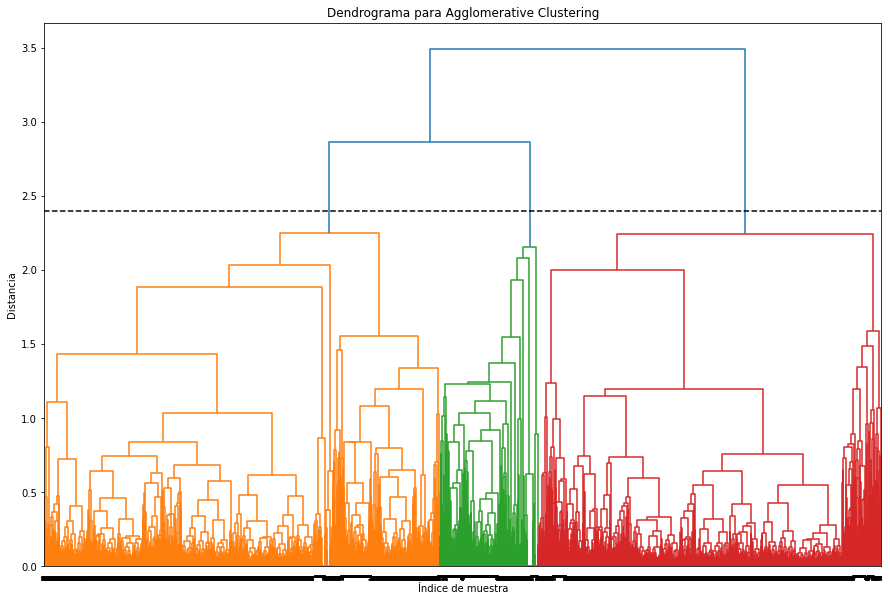

In [54]:
# Calculamos la matriz de enlace
linkage_matrix = linkage(cluster_df_normal, method='ward')

plt.figure(figsize=(15, 10))

# Graficar el dendrograma
dendrogram(linkage_matrix, orientation='top', labels=agg_labels, distance_sort='descending', show_leaf_counts=True)
plt.axhline(y=2.4, c='black', linestyle='--', label='Altura de Corte')

plt.title('Dendrograma para Agglomerative Clustering')
plt.xlabel('Índice de muestra')
plt.ylabel('Distancia')

plt.show()